<a href="https://colab.research.google.com/github/Nikkapel/12.08.12.21g-2/blob/main/Python_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

получение даных


In [160]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [161]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Одеса")
data_json = response.json()

Создание DataFrame

In [175]:
df = pd.DataFrame(data_json["data"])

In [178]:
df.head()

,at,val
0,2022-05-23,808
1,2022-05-24,788
2,2022-05-25,808
3,2022-05-26,877
4,2022-05-27,904


In [179]:
df.shape

(387, 2)

In [180]:
df.columns

Index(['at', 'val'], dtype='object')

In [181]:
df.dtypes

at     object
val     int64
dtype: object

In [182]:
df.shape

(387, 2)

In [186]:
df["at"] = pd.to_datetime(df["at"])

In [187]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [ ]:
df = df.rename(columns = {"at": "Дата", "val": "вакансии"})

In [ ]:
df.dtypes

Подготовка даных

In [190]:
df["at"] = pd.to_datetime(df["at"])

In [191]:
df.head()

,at,val
0,2022-05-23,808
1,2022-05-24,788
2,2022-05-25,808
3,2022-05-26,877
4,2022-05-27,904


In [192]:
df = df.rename(columns = {"at": "Дата", "val": "вакансии"})

In [207]:
df.head()

,вакансии
Дата,
2022-05-23,808
2022-05-24,788
2022-05-25,808
2022-05-26,877
2022-05-27,904


In [ ]:
df.set_index('Дата', inplace=True)

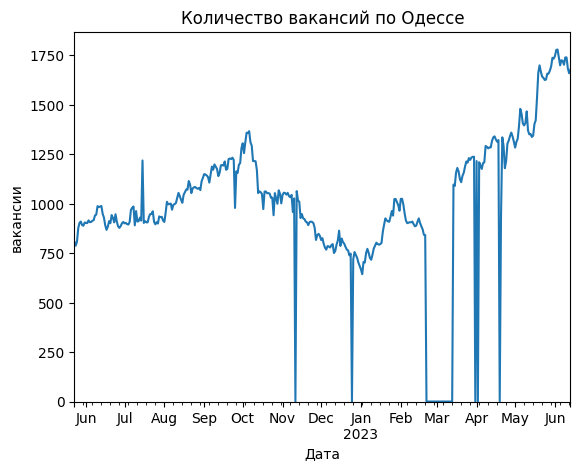

In [208]:
df["вакансии"].plot()
plt.title("Количество вакансий по Одессе")
plt.xlabel('Дата')
plt.ylabel('вакансии')
plt.ylim(bottom = 0)
plt.show()

In [216]:
df["вакансии"] = df['вакансии'].replace(0,np.nan)
df['вакансии'] = df['вакансии'].interpolate()

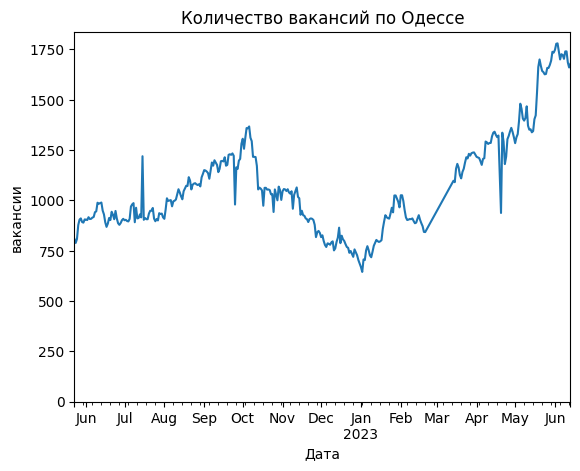

In [217]:
df["вакансии"].plot()
plt.title("Количество вакансий по Одессе")
plt.xlabel('Дата')
plt.ylabel('вакансии')
plt.ylim(bottom = 0)
plt.show()

In [218]:
df["rolling_mean"] = df['вакансии'].rolling(window=7).mean()


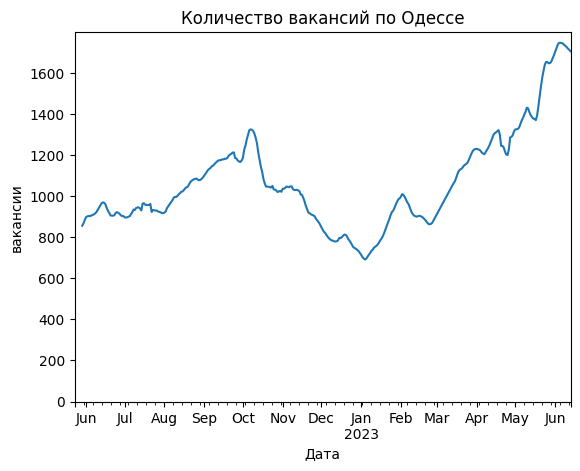

In [219]:
df["rolling_mean"].plot()
plt.title("Количество вакансий по Одессе")
plt.xlabel('Дата')
plt.ylabel('вакансии')
plt.ylim(bottom = 0)
plt.show()

In [220]:
df.describe()

,вакансии,rolling_mean
count,387.000000,381.000000
mean,1066.372093,1063.337833
std,243.644550,234.397455
min,644.000000,691.000000
25%,904.500000,905.857143
50%,1008.000000,1009.142857
75%,1202.500000,1194.428571
max,1780.000000,1745.285714


In [ ]:
df["rolling_mean"].plot()
plt.title("Количество вакансий по Одессе")
plt.xlabel('Дата')
plt.ylabel('вакансии')
plt.ylim(bottom = 0)
plt.show()

KeyError: ignored